In [1]:
#  Data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#  NLP libraries: spaCy
import spacy
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

sns.set()

In [2]:
#!python -m spacy download en_core_web_sm

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df =pd.read_csv('/content/drive/My Drive/deep_imbalanced_dataset.csv')
df

,review_text,Rating,review_length
0,great tasting and the added benefit is the fib...,4,35.0
1,100 bags of oolong tea for this price lets kee...,5,89.0
2,they make me tired from having to chew so much...,2,20.0
3,great coffee with full rich flavor and satisfy...,4,106.0
4,i cannot drive at this time so getting my groc...,5,54.0
...,...,...,...
99995,were terribly disappointed this was the second...,1,76.0
99996,firm sweet and tasty if you cook it right firm...,4,55.0
99997,of course these dont taste as great as the cer...,4,50.0
99998,the last shipping i got the tea is so horrible...,1,87.0


In [6]:
#shape of the dataset
df.shape

(100000, 3)

In [7]:
df.isnull().sum()

,0
review_text,0
Rating,0
review_length,0


In [8]:
#checking for the duplicate values
df.duplicated().sum()

np.int64(0)

In [9]:
#display 3 full sample reviews per rating
for rating in sorted(df['Rating'].unique()):
    print(f"\n⭐ Rating {rating}")
    reviews = df[df['Rating'] == rating].tail(3)
    for _, row in reviews.iterrows():
        print(f"\n- {row['review_text']}\n")


⭐ Rating 1

- this instant coffee brand is way overrated and doesnt even compare to the taste and aroma of tasters choice instant coffee french roast


- were terribly disappointed this was the second time we ordered this product the first 5lb bag was incredible we snarfed them all down the olives were firm and full of flavor had a nice greek olive scent the second one was terrible they tasted rancid and smelled terrible we ended up throwing them all away we were afraid wed get sick we will not be ordering again very disappointed that the product was not even edible


- the last shipping i got the tea is so horrible it is like the 3rd time that you put water init is so weak it hardly tasted like green tea that i used to get i dont know what wrong with it i ordered 6 boxeseach so it took me a few months to finish all 6 boxes with 2nd package with 6 boxes those a received about a couple months ago they are so terrible it almost does not smell like a real tea any more


⭐ Rating 2

- whe

In [10]:
df['word_count'] = df['review_text'].apply(lambda x: len(str(x).split()))

In [11]:
#display the statistics of the word count
min_word_counts = df.groupby('Rating')['word_count'].describe()
print(min_word_counts)

          count       mean        std  min   25%   50%    75%    max
Rating                                                              
1       10000.0  76.703500  61.420067  5.0  35.0  59.0   97.0  499.0
2       15000.0  77.265000  74.149615  4.0  29.0  54.0   98.0  500.0
3       25000.0  87.303160  79.162376  4.0  34.0  59.0  111.0  500.0
4       30000.0  85.589767  70.755941  5.0  37.0  63.0  110.0  497.0
5       20000.0  70.864350  59.673597  4.0  32.0  52.0   88.0  498.0


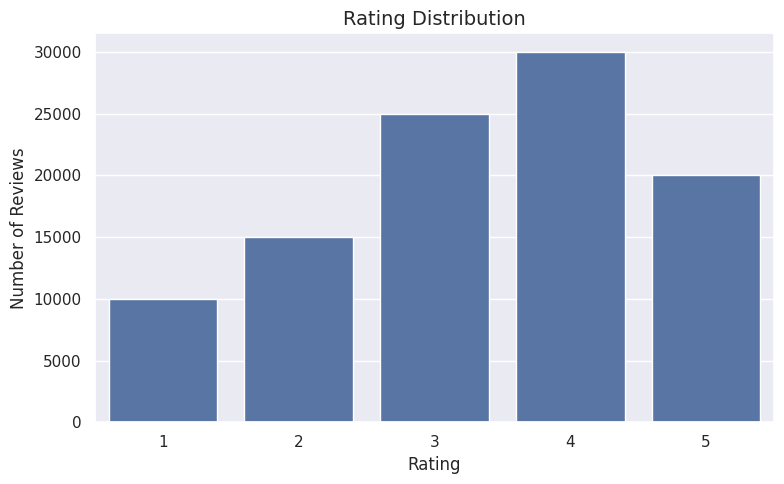

In [12]:
#  Visualize the distribution of review ratings

plt.figure(figsize=(8, 5))  # Set figure size

# Create a count plot for the 'Rating' column
sns.countplot(x='Rating', data=df)

# Add plot titles and labels
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

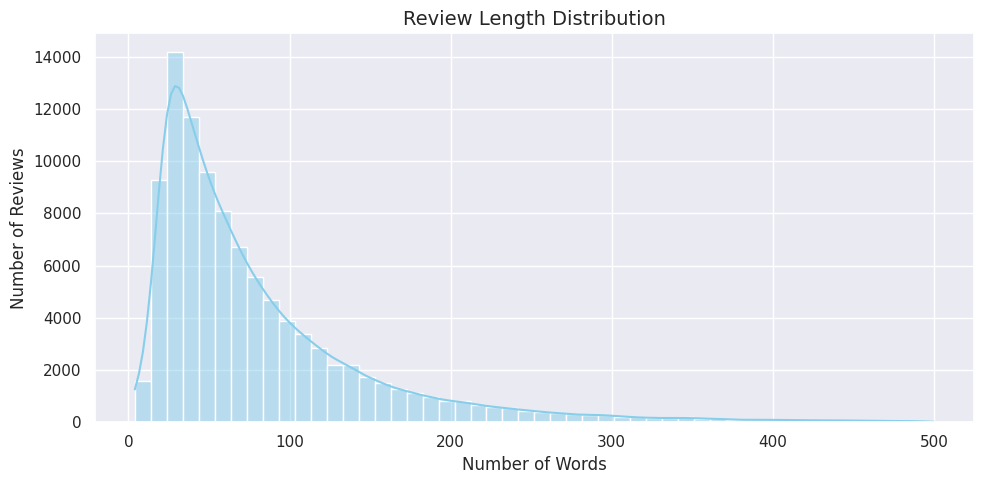

In [13]:
# Visualize the distribution of review lengths (number of words per review)

plt.figure(figsize=(10, 5))  # Set the size of the plot

# Create a histogram of review lengths with a KDE (smoothed line)
sns.histplot(data=df, x='review_length', bins=50, kde=True, color='skyblue')

# Add titles and axis labels
plt.title("Review Length Distribution", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()

In [14]:
# Count the number of reviews per rating (sorted by rating value)
rating_counts = df['Rating'].value_counts().sort_index()

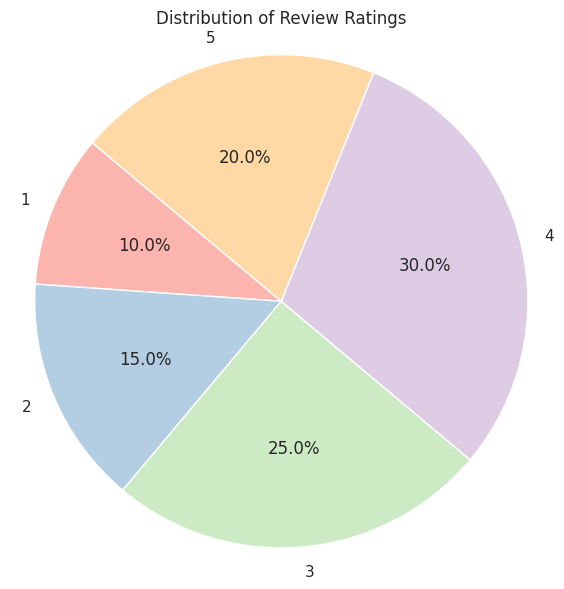

In [15]:
# Labels for pie slices (e.g., '1', '2', ..., '5')
labels = rating_counts.index.astype(str)
#Corresponding values (number of reviews per rating)
sizes = rating_counts.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

In [16]:
#  Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['review_text'],df['Rating'], test_size=0.2, random_state=42,shuffle=True,stratify=df['Rating'] )

In [17]:
print("Train Rating Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Rating Distribution:\n", y_test.value_counts(normalize=True))

Train Rating Distribution:
 Rating
4    0.30
3    0.25
5    0.20
2    0.15
1    0.10
Name: proportion, dtype: float64

Test Rating Distribution:
 Rating
4    0.30
3    0.25
5    0.20
2    0.15
1    0.10
Name: proportion, dtype: float64


In [18]:
def spacy_preprocess_pipe(texts):
    processed = []
    for doc in nlp.pipe(texts, batch_size=1000, disable=["ner", "parser"]):  # disable unneeded parts
        tokens = [
            token.lemma_
            for token in doc
            if not token.is_stop and not token.is_space and token.is_alpha
        ]
        processed.append(" ".join(tokens))
    return processed

In [19]:
#print the list of stopwords
print(sorted(nlp.Defaults.stop_words))
# Print total number of unique stopwords in spaCy's English model
print("Number of spaCy stopwords:", len(nlp.Defaults.stop_words))

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'he

In [20]:
X_train = pd.Series(spacy_preprocess_pipe(X_train))
X_test = pd.Series(spacy_preprocess_pipe(X_test))

In [21]:
print(type(X_test))
print(type(y_test))


<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [22]:
# Save preprocessed training and test data
#X_train.to_pickle("/content/drive/My Drive/X_train_preprocessed_imbalanced.pkl")
#X_test.to_pickle("/content/drive/My Drive/X_test_preprocessed_imbalanced.pkl")

In [23]:
# Load saved preprocessed data
#X_train = pd.read_pickle("X_train_preprocessed_imbalanced.pkl")
#X_test = pd.read_pickle("X_test_preprocessed_imbalanced.pkl")

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define tokenizer parameters
vocab_size = 10000
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")

# Fit tokenizer on training data
tokenizer.fit_on_texts(X_train)

# Convert text to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [25]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 100

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

In [26]:
#import pickle





#with open('/content/drive/My Drive/maxlen_imbalanced2.pkl', 'wb') as f:
#    pickle.dump(max_len, f)


In [27]:
#  Fix the labels (make them start from 0)
y_train = y_train - 1
y_test = y_test - 1

In [28]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip glove.6B.zip

In [29]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/wiki.simple.vec.zip
!unzip wiki.simple.vec.zip


--2025-08-05 03:12:32--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/wiki.simple.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.59, 13.227.219.33, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 403 Forbidden
2025-08-05 03:12:32 ERROR 403: Forbidden.

unzip:  cannot find or open wiki.simple.vec.zip, wiki.simple.vec.zip.zip or wiki.simple.vec.zip.ZIP.


In [30]:
import numpy as np

embedding_index = {}
embedding_dim = 300  # FastText uses 300-dim vectors

# Change path accordingly if it's in Drive
with open("/content/drive/MyDrive/wiki.simple.vec", encoding='utf-8') as f:
    next(f)  # skip header line (e.g., "111051 300")
    for line in f:
        values = line.rstrip().split(' ')
        word = values[0]
        try:
            vector = np.asarray(values[1:], dtype='float32')
            if vector.shape[0] == embedding_dim:  # ensure it's valid
                embedding_index[word] = vector
        except ValueError:
            continue  # skip malformed lines


In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Assuming you have already fitted your tokenizer
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding token

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector





In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping


model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,  # use same padding length
                    trainable=True))
model.add(Bidirectional(LSTM(128, return_sequences=False)))
model.add(Dropout(0.5))  # optional but helps reduce overfitting
model.add(Dense(32, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 classes for ratings

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=64, validation_data=(X_test_pad, y_test),callbacks=[early_stop])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │    29,510,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,510,700 (112.57 MB)

 Trainable params: 29,510,700 (112.57 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 48s 34ms/step - accuracy: 0.4574 - loss: 1.2392 - val_accuracy: 0.5531 - val_loss: 1.0428
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 33ms/step - accuracy: 0.5714 - loss: 0.9933 - val_accuracy: 0.5538 - val_loss: 1.0306
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6110 - loss: 0.9144 - val_accuracy: 0.5561 - val_loss: 1.0532
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 33ms/step - accuracy: 0.6466 - loss: 0.8381 - val_accuracy: 0.5483 - val_loss: 1.0755
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.6868 - loss: 0.7574 - val_accuracy: 0.5396 - val_loss: 1.1480


In [33]:
model.save("/content/drive/MyDrive/deep_imbalanced_model3.h5")